In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/data.csv')
data=pd.read_csv('/content/drive/MyDrive/data.csv')
dataset.head()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772


In [ ]:
for col in data:
    print (type(data[col][1]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%d/%m/%Y %H:%M:%S')
data['timestamp']

0      2018-02-28 21:00:00
1      2018-02-28 21:15:00
2      2018-02-28 10:15:00
3      2018-02-28 10:15:00
4      2018-02-28 10:30:00
               ...        
2085   2018-07-03 03:50:00
2086   2018-07-03 21:10:00
2087   2018-07-03 12:10:00
2088   2018-07-03 10:35:00
2089   2018-07-03 23:45:00
Name: timestamp, Length: 2090, dtype: datetime64[ns]

In [ ]:
column_1 = data.iloc[:,0]


db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })
dataset1=dataset.drop('timestamp',axis=1)
data1=pd.concat([db,dataset1],axis=1)

<ipython-input-21-c196537de1c1>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  "week": column_1.dt.week,
<ipython-input-21-c196537de1c1>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  "weekofyear": column_1.dt.weekofyear,


In [ ]:
dataset1=dataset.drop('timestamp',axis=1)
data1=pd.concat([db,dataset1],axis=1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        2068 non-null   float64
 1   month       2068 non-null   float64
 2   day         2068 non-null   float64
 3   hour        2068 non-null   float64
 4   dayofyear   2068 non-null   float64
 5   week        2068 non-null   float64
 6   weekofyear  2068 non-null   float64
 7   dayofweek   2068 non-null   float64
 8   weekday     2068 non-null   float64
 9   quarter     2068 non-null   float64
 10  act379      2090 non-null   int64  
 11  act13       2090 non-null   int64  
 12  act279      2090 non-null   int64  
 13  act323      2090 non-null   int64  
 14  act363      2090 non-null   int64  
 15  act302      2090 non-null   int64  
 16  latitude    2090 non-null   float64
 17  longitude   2090 non-null   float64
dtypes: float64(12), int64(6)
memory usage: 294.0 KB


In [ ]:
data1.dropna(inplace=True)
data1.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,act379,act13,act279,act323,act363,act302,latitude,longitude
0,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.737260,75.875987
1,2018.0,2.0,28.0,21.0,59.0,9.0,9.0,2.0,2.0,1.0,1,0,0,0,0,0,22.720992,75.876083
2,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.736676,75.883168
3,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.746527,75.887139
4,2018.0,2.0,28.0,10.0,59.0,9.0,9.0,2.0,2.0,1.0,0,0,1,0,0,0,22.769531,75.888772


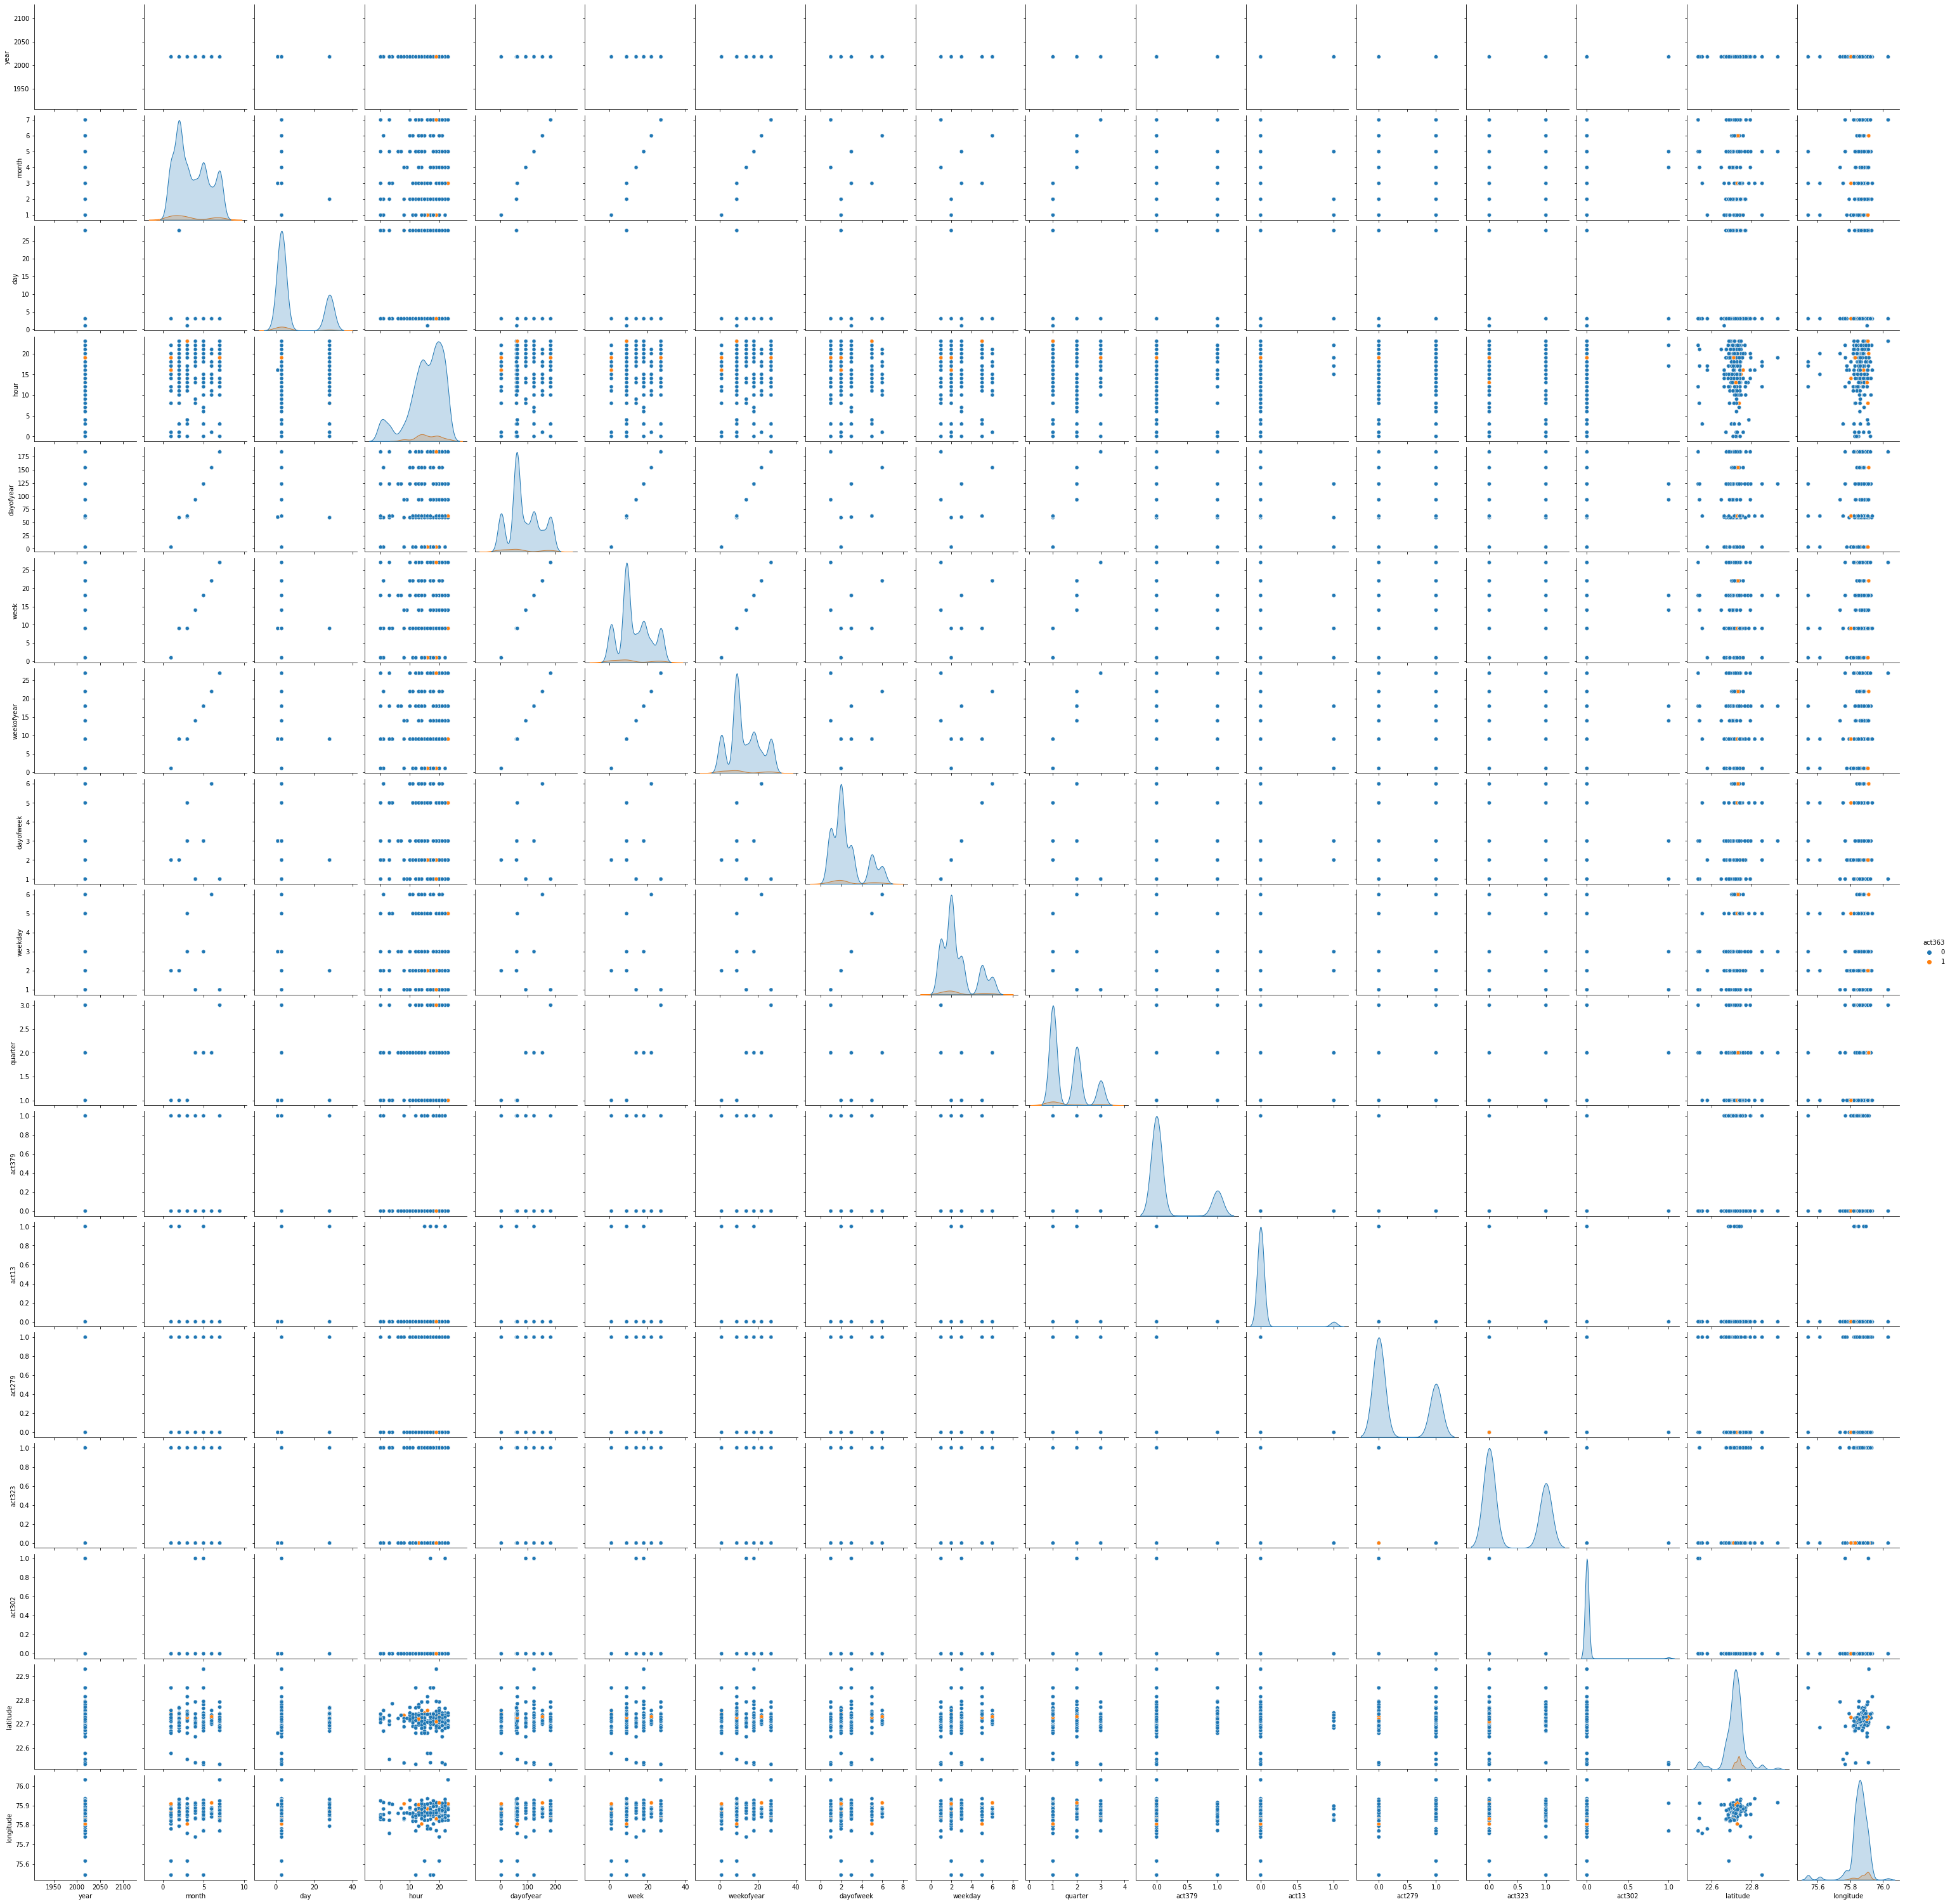

In [ ]:
sns.pairplot(data1,hue='act363')

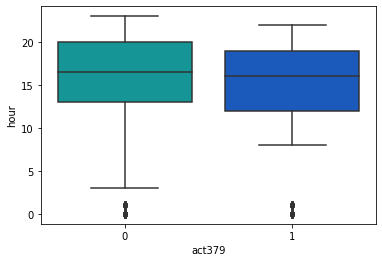

In [ ]:
sns.boxplot(x='act379' ,y='hour' ,data=data1, palette='winter_r')

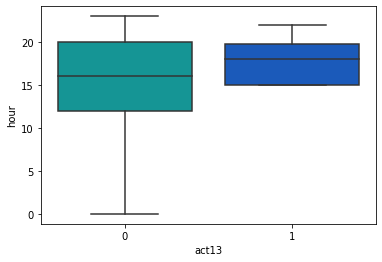

In [ ]:
sns.boxplot(x='act13' ,y='hour' ,data=data1 , palette='winter_r')

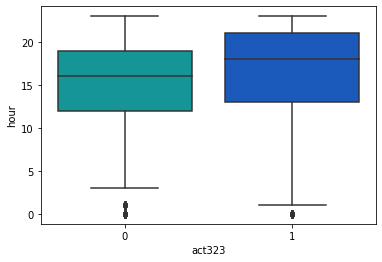

In [ ]:
sns.boxplot(x='act323' ,y='hour' ,data=data1, palette='winter_r')

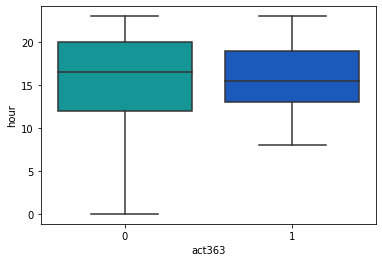

In [ ]:
sns.boxplot(x='act363' ,y='hour' ,data=data1, palette='winter_r')

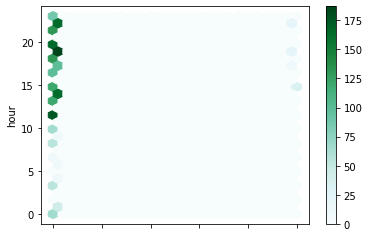

In [ ]:
df = pd.DataFrame(data=data1, columns=['act13', 'hour', 'day'])
df.plot.hexbin(x='act13',y='hour',gridsize=25)

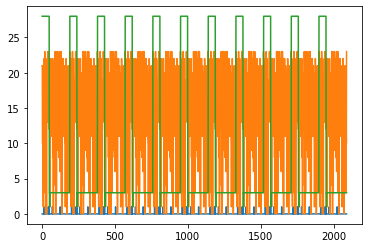

In [ ]:
df.plot(legend=False)

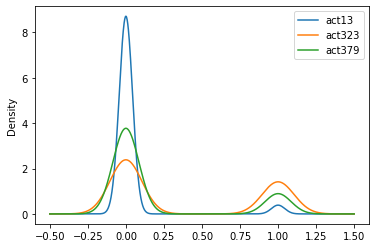

In [ ]:
df1 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379'])
df1.plot.kde()

In [ ]:
X=data1.iloc[:,[1,2,3,4,6,16,17]].values
X

array([[ 2.      , 28.      , 21.      , ...,  9.      , 22.73726 ,
        75.875987],
       [ 2.      , 28.      , 21.      , ...,  9.      , 22.720992,
        75.876083],
       [ 2.      , 28.      , 10.      , ...,  9.      , 22.736676,
        75.883168],
       ...,
       [ 7.      ,  3.      , 12.      , ..., 27.      , 22.531931,
        75.769126],
       [ 7.      ,  3.      , 10.      , ..., 27.      , 22.719569,
        75.857726],
       [ 7.      ,  3.      , 23.      , ..., 27.      , 22.686437,
        76.032055]])

In [ ]:
y=data1.iloc[:,[10,11,12,13,14,15]].values
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test,y_test)

0.9371980676328503

In [ ]:
knn.score(X_train,y_train)

0.9824667472793228

Text(0, 0.5, 'Error Rate')

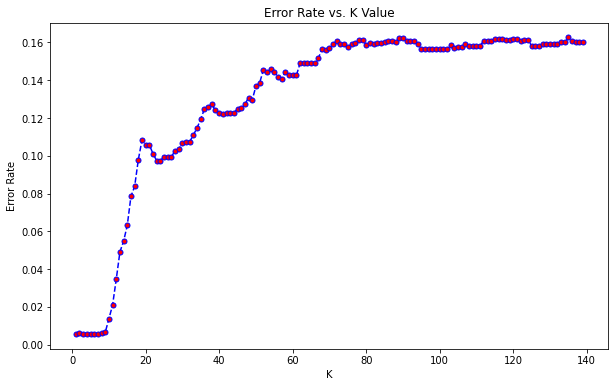

In [ ]:
error_rate = []
for i in range(1,140):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [ ]:
y_pred=dtree.predict(X_test)
dtree.score(X_test,y_test)

0.9806763285024155

In [ ]:
dtree.score(X_train,y_train)

0.9915356711003628

In [ ]:
y_pred

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [ ]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)
treefeatures

array([0.00934881, 0.03958678, 0.3138252 , 0.09146966, 0.0174176 ,
       0.26411523, 0.26423671])

In [ ]:
features = data1.iloc[:,[1,2,3,4,6,16,17]]

Text(0.5, 0, 'Relative Importance')

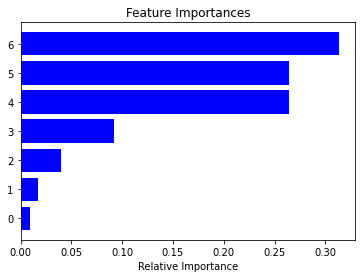

In [ ]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.xlabel('Relative Importance')

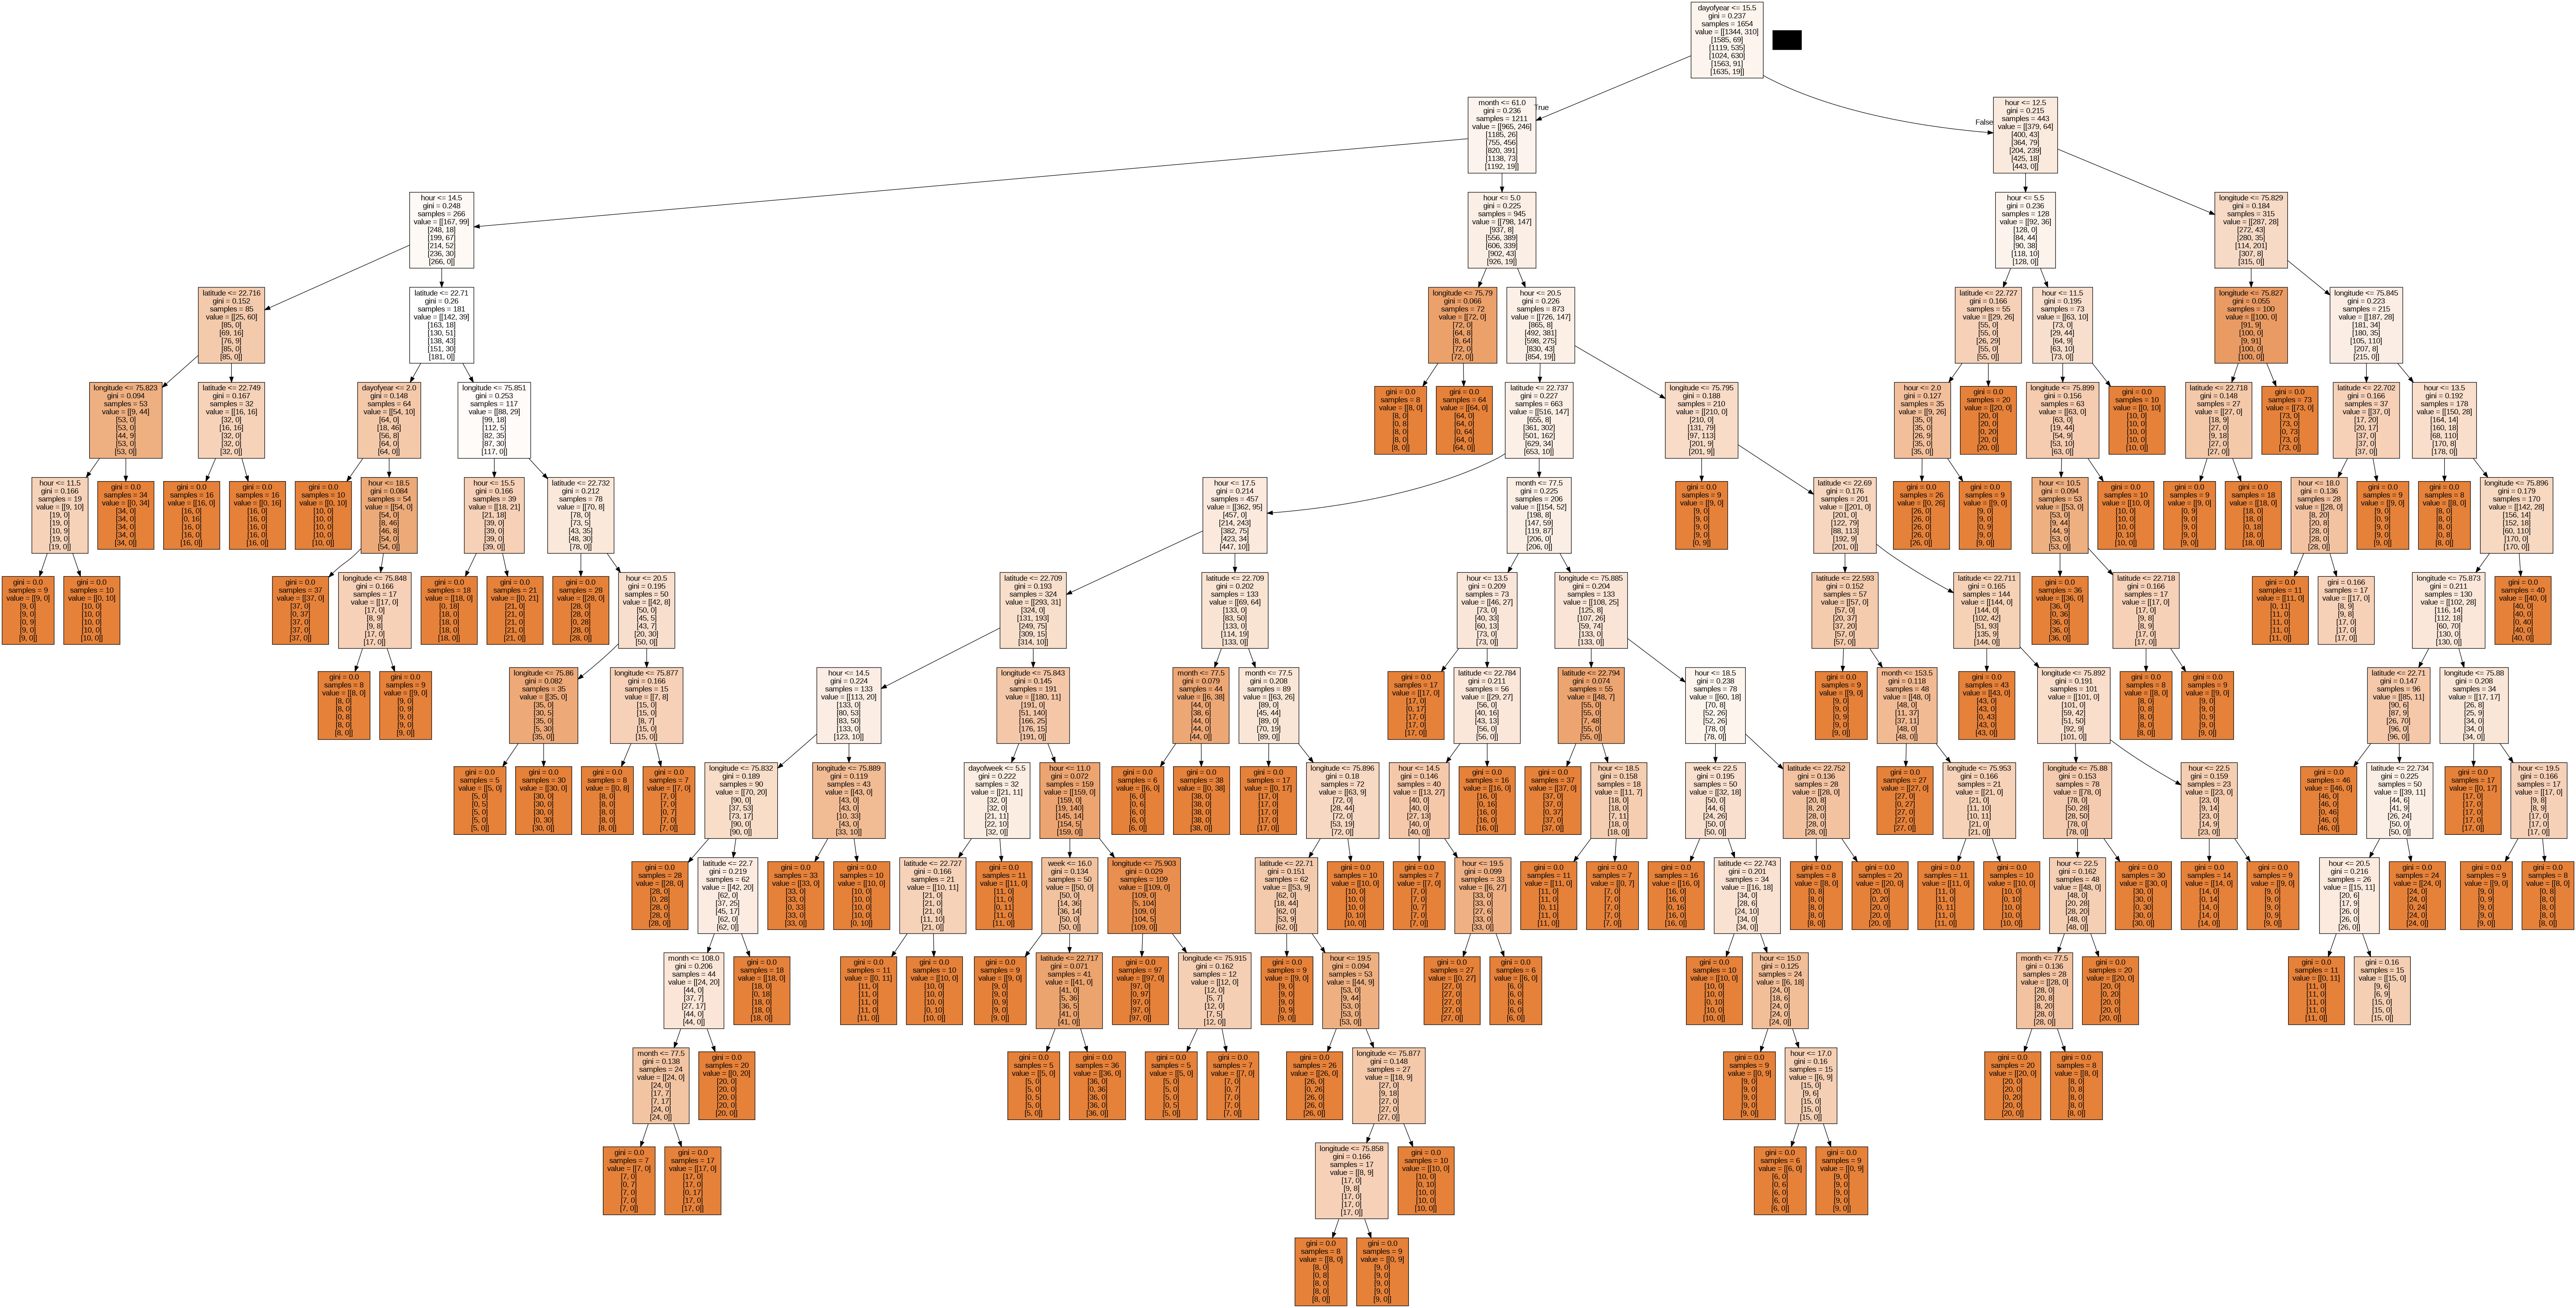

In [ ]:
feature_names=[ 'dayofweek', 'dayofyear', 'hour', 'month', 'week','latitude', 'longitude']
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(X_test)
rfc.score(X_test,y_test)

0.9806763285024155

In [ ]:
rfc.score(X_train,y_train)


0.9915356711003628

In [ ]:
om=rfc.feature_importances_
indices = np.argsort(om)
om

array([0.03682791, 0.02061608, 0.31472177, 0.03885698, 0.03025756,
       0.28806966, 0.27065005])

Text(0.5, 0, 'Relative Importance')

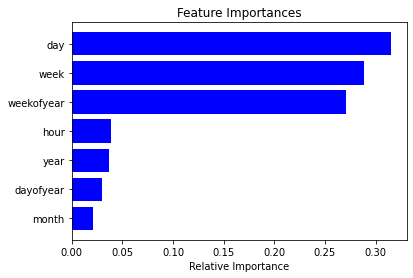

In [ ]:
features = data1.columns
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')